# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player taking the last object wins.

* Task3.4: An agent using reinforcement learning

In [12]:
# Copied and adapted from
# https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88


from nim_environment import NimBoard
from rl_agent import Agent
import matplotlib.pyplot as plt
from nim_utils import game_over, level_zero, pure_random, level_two, level_three, expert_strategy, Nimply

## **Reinforcement Learning**

In [14]:
def reinforcement_learning_nim(nim_size, strategy, robot=None):
    nim = NimBoard(nim_size)
    if robot is None:
        robot = Agent(nim, alpha=0.1, random_factor=0.4)
    moveHistory = []
    indices = []

    nim.display_board()
    print()
    
    players = ['agent', 'b']
    turn = 0

    final_state = tuple([0 for _ in range(nim_size)])

    for i in range(10_000):

        while not game_over(nim, players, turn):
            
            if players[turn] == "b":
                 ply = strategy(nim)
                 nim.nimming(ply)

            if players[turn] == "agent":
                state, _ = nim.get_state_and_reward()  # get the current state
                # choose an action (explore or exploit)
                action = robot.choose_action(state)
                nim.update_board(action)  # update the nim according to the action
                state, reward = nim.get_state_and_reward()  # get the new state and reward
                # update the robot memory with state and reward
                if state != final_state:
                    robot.update_state_history(state, reward)
                if nim.steps > 1000:
                    # end the robot if it takes too long to find the goal
                    for idx in range(len(nim.rows)):
                        nim.rows[idx] = 0
            
            turn = (turn + 1) % 2
        state, reward = nim.get_state_and_reward(nim.winner == 0)
        robot.update_state_history(state, reward)

        robot.update_results(nim.winner == 0)
        robot.learn()  # robot should learn after every episode
        # get a history of number of steps taken to plot later
        if i % 200 == 0 and i != 0:
            print(f"{i}: {robot.get_avg_wins()}")
            moveHistory.append(robot.get_avg_wins())
            indices.append(i)
        nim = NimBoard(nim_size)  # reinitialize the nim

    plt.semilogy(indices, moveHistory, "b")
    plt.show()

    return robot


#### **Reinforce Agent with Nim(3)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.8159203980099502
400: 0.8428927680798005
600: 0.8718801996672213
800: 0.8888888888888888
1000: 0.8871128871128872
1200: 0.8959200666111574
1400: 0.9029264810849393
1600: 0.905683947532792
1800: 0.9089394780677401
2000: 0.9145427286356822
2200: 0.9177646524307133
2400: 0.9192003331945023
2600: 0.9215686274509803
2800: 0.9253837915030346
3000: 0.9283572142619126
3200: 0.930021868166198
3400: 0.9338429873566598
3600: 0.9375173562899195
3800: 0.9405419626414101
4000: 0.9435141214696325
4200: 0.946203284932159
4400: 0.948648034537605
4600: 0.9508802434253423
4800: 0.9529264736513227
5000: 0.9548090381923615
5200: 0.9565468179196308
5400: 0.9581558970561007
5600: 0.9596500624888413
5800: 0.9610411997931391
6000: 0.9623396100649891
6200: 0.9635542654410579
6400: 0.964693016716138
6600: 0.9657627632176943
6800: 0.9667695927069548
7000: 0.9677188973003856
7200: 0.9686154700736009
7400: 0.9694635860018916
7600: 0.9702670701223524
7800: 0

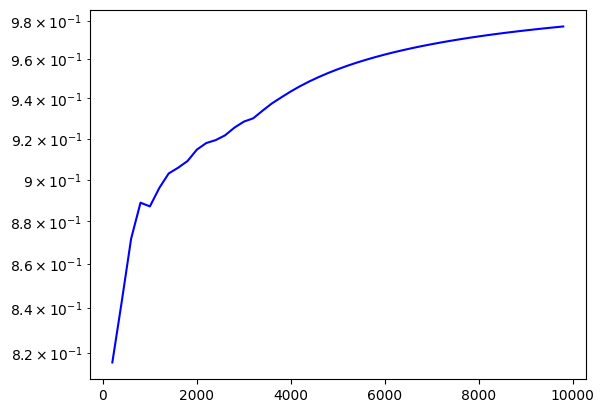

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.6965174129353234
400: 0.7182044887780549
600: 0.7371048252911814
800: 0.731585518102372
1000: 0.7402597402597403
1200: 0.7518734388009992
1400: 0.7544610992148465
1600: 0.7632729544034978
1800: 0.7673514714047751
2000: 0.775112443778111
2200: 0.7800999545661064
2400: 0.7817576009995835
2600: 0.7904652056901191
2800: 0.800071403070332
3000: 0.8053982005998
3200: 0.8122461730709153
3400: 0.8168185827697736
3600: 0.8214384893085254
3800: 0.823993685872139
4000: 0.828542864283929
4200: 0.835753392049512
4400: 0.8423085662349467
4600: 0.8487285372745056
4800: 0.8550302020412414
5000: 0.8600279944011198
5200: 0.8644491443953086
5400: 0.8687280133308647
5600: 0.8734154615247277
5800: 0.8774349250129289
6000: 0.8813531078153641
6200: 0.8848572810836962
6400: 0.8879862521481019
6600: 0.8907741251325557
6800: 0.8938391413027496
7000: 0.896586201971147
7200: 0.8990417997500347
7400: 0.9012295635724902
7600: 0.9036968819892119
7800: 0.9052

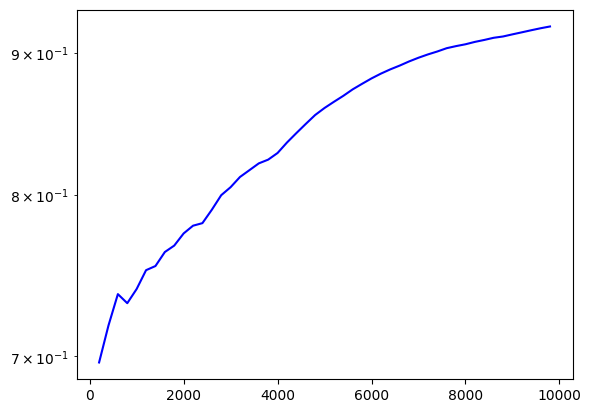

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.3880597014925373
400: 0.40399002493765584
600: 0.4209650582362729
800: 0.4419475655430712
1000: 0.45854145854145856
1200: 0.47793505412156534
1400: 0.4853675945753034
1600: 0.5084322298563397
1800: 0.5235980011104941
2000: 0.5372313843078461
2200: 0.5520218082689686
2400: 0.571012078300708
2600: 0.5851595540176855
2800: 0.6015708675473045
3000: 0.6167944018660446
3200: 0.6316776007497656
3400: 0.6483387239047339
3600: 0.6631491252429881
3800: 0.6782425677453302
4000: 0.69407648087978
4200: 0.7086407998095692
4400: 0.721881390593047
4600: 0.7339708758965442
4800: 0.7450531139345969
5000: 0.755248950209958
5200: 0.7646606421841954
5400: 0.7733753008702092
5600: 0.7814675950723086
5800: 0.7890018962247888
6000: 0.7960339943342776
6200: 0.8026124818577649
6400: 0.80877987814404
6600: 0.8145735494622027
6800: 0.8200264666960742
7000: 0.8251678331666905
7200: 0.8300236078322455
7400: 0.8346169436562627
7600: 0.8389685567688462
7800: 

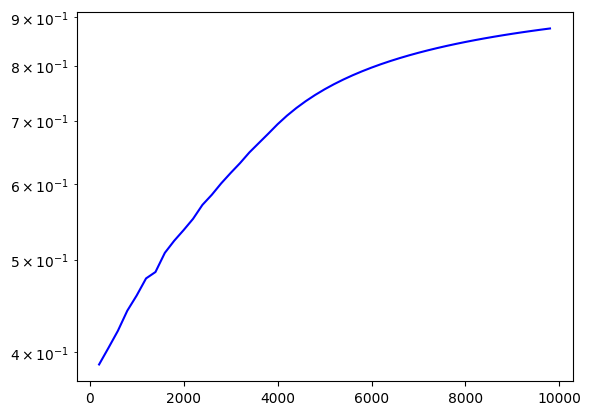

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.18407960199004975
400: 0.2543640897755611
600: 0.2895174708818636
800: 0.32209737827715357
1000: 0.36563436563436563
1200: 0.38384679433805163
1400: 0.4097073518915061
1600: 0.42348532167395375
1800: 0.45086063298167683
2000: 0.463768115942029
2200: 0.4843253066787824
2400: 0.5085381091211995
2600: 0.5244136870434448
2800: 0.5401642270617637
3000: 0.5561479506831056
3200: 0.5738831615120275
3400: 0.5912966774478094
3600: 0.6078866981394058
3800: 0.6248355695869509
4000: 0.6430892276930767
4200: 0.660080933111164
4400: 0.6755282890252216
4600: 0.6896326885459683
4800: 0.7025619662570298
5000: 0.7144571085782844
5200: 0.7254374158815612
5400: 0.7356045176819107
5600: 0.7450455275843599
5800: 0.753835545595587
6000: 0.7620396600566572
6200: 0.7697145621673923
6400: 0.7769098578347133
6600: 0.7836691410392365
6800: 0.7900308778120865
7000: 0.7960291386944722
7200: 0.8016942091376198
7400: 0.8070531009323064
7600: 0.8121299828969872

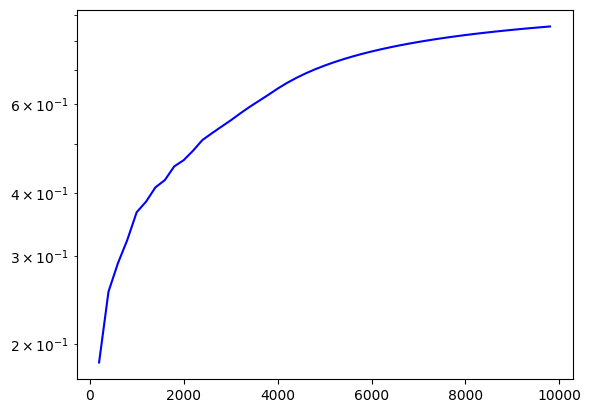

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.15920398009950248
400: 0.18952618453865336
600: 0.21630615640599002
800: 0.23220973782771537
1000: 0.23876123876123875
1200: 0.25062447960033307
1400: 0.26409707351891504
1600: 0.2723297938788257
1800: 0.2809550249861188
2000: 0.2908545727136432
2200: 0.2975920036347115
2400: 0.3036234902124115
2600: 0.31218762014609763
2800: 0.320599785790789
3000: 0.32822392535821393
3200: 0.3352077475788816
3400: 0.34342840341076153
3600: 0.3507359066925854
3800: 0.35753749013417524
4000: 0.364158960259935
4200: 0.3706260414187098
4400: 0.37650533969552374
4600: 0.3818735057596175
4800: 0.3867944178296188
5000: 0.39132173565286943
5200: 0.39550086521822725
5400: 0.39937048694686167
5600: 0.40296375647205857
5800: 0.4063092570246509
6000: 0.4094317613731045
6200: 0.4123528463151105
6400: 0.41509139197000466
6600: 0.4176639903044993
6800: 0.4200852815762388
7000: 0.4223682331095558
7200: 0.42452437161505346
7400: 0.42656397784083233
7600: 0.42

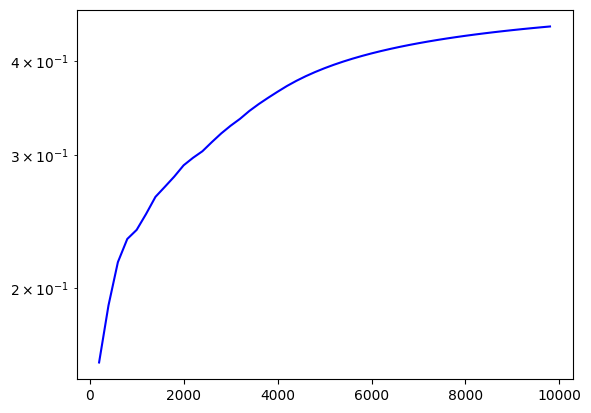

In [20]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(5)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.8407960199004975
400: 0.8553615960099751
600: 0.8735440931780366
800: 0.8863920099875156
1000: 0.8941058941058941
1200: 0.8992506244796004
1400: 0.9043540328336902
1600: 0.9113054341036851
1800: 0.9172681843420322
2000: 0.9245377311344328
2200: 0.9282144479781917
2400: 0.9308621407746772
2600: 0.934640522875817
2800: 0.9389503748661192
3000: 0.9420193268910363
3200: 0.9450171821305842
3400: 0.9482505145545428
3600: 0.9511246875867815
3800: 0.9536963956853459
4000: 0.9560109972506873
4200: 0.9581052130445132
4400: 0.9600090888434447
4600: 0.9617474462073462
4800: 0.9633409706311186
5000: 0.9648070385922816
5200: 0.9661603537781196
5400: 0.9674134419551935
5600: 0.9685770398143189
5800: 0.9696604033787278
6000: 0.9706715547408765
6200: 0.9716174810514433
6400: 0.9725042962037181
6600: 0.973337373125284
6800: 0.97412145272754
7000: 0.9748607341808313
7200: 0.9755589501458131
74

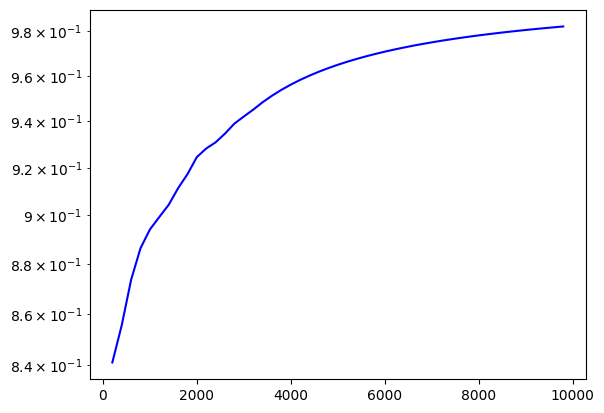

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.7711442786069652
400: 0.7680798004987531
600: 0.7886855241264559
800: 0.7902621722846442
1000: 0.7922077922077922
1200: 0.8026644462947544
1400: 0.8022840827980015
1600: 0.8051217988757027
1800: 0.8067740144364242
2000: 0.8100949525237381
2200: 0.8091776465243071
2400: 0.8117451062057476
2600: 0.8154555940023068
2800: 0.8211353088182792
3000: 0.8273908697100967
3200: 0.8334895345204624
3400: 0.83857688915025
3600: 0.8433768397667315
3800: 0.8487240199947382
4000: 0.8555361159710072
4200: 0.861461556772197
4400: 0.8668484435355601
4600: 0.8713323190610737
4800: 0.8756509060612372
5000: 0.8800239952009599
5200: 0.8838684868294558
5400: 0.8866876504351046
5600: 0.8894840207105874
5800: 0.8924323392518532
6000: 0.8950174970838194
6200: 0.8977584260603129
6400: 0.8998593969692236
6600: 0.9019845477957885
6800: 0.9042787825319806
7000: 0.9061562633909441
7200: 0.9076517150395779
7

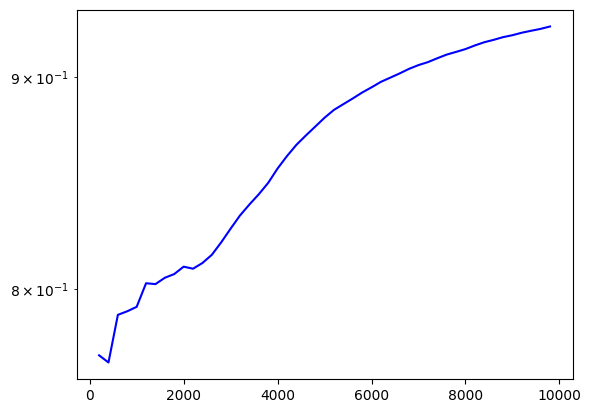

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.5522388059701493
400: 0.5511221945137157
600: 0.5823627287853578
800: 0.6004993757802747
1000: 0.6333666333666333
1200: 0.6427976686094921
1400: 0.6602426837972877
1600: 0.6708307307932542
1800: 0.6862853970016657
2000: 0.6996501749125438
2200: 0.7137664697864607
2400: 0.721366097459392
2600: 0.7331795463283353
2800: 0.744019992859693
3000: 0.7547484171942686
3200: 0.7656982193064668
3400: 0.776536312849162
3600: 0.7872813107470147
3800: 0.7976848197842673
4000: 0.8072981754561359
4200: 0.8164722685074982
4400: 0.8248125426039536
4600: 0.8324277331014996
4800: 0.8394084565715476
5000: 0.8458308338332333
5200: 0.8517592770621034
5400: 0.8572486576559897
5600: 0.8623460096411355
5800: 0.8670918807102224
6000: 0.871521413097817
6200: 0.8756652152878568
6400: 0.8795500703015154
6600: 0.8831995152249659
6800: 0.8866343184825761
7000: 0.8898728753035281
7200: 0.892931537286488
740

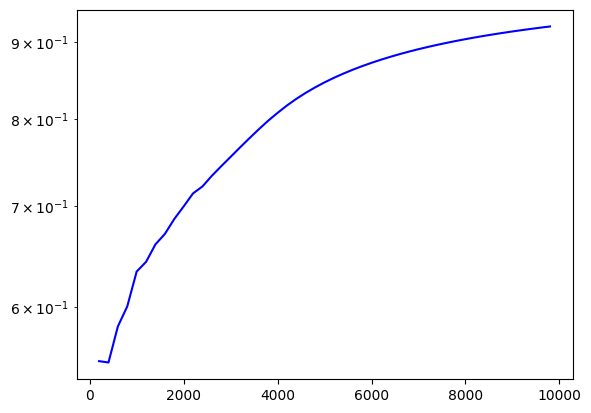

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.3283582089552239
400: 0.3541147132169576
600: 0.3826955074875208
800: 0.4232209737827715
1000: 0.45254745254745254
1200: 0.4787676935886761
1400: 0.5074946466809421
1600: 0.532792004996877
1800: 0.5446973903387007
2000: 0.553223388305847
2200: 0.574738755111313
2400: 0.5951686797167847
2600: 0.6105344098423683
2800: 0.6272759728668332
3000: 0.6444518493835388
3200: 0.6582318025616994
3400: 0.6742134666274625
3600: 0.6884198833657318
3800: 0.7008681925808997
4000: 0.715071232191952
4200: 0.7286360390383242
4400: 0.7409679618268575
4600: 0.7522277765703108
4800: 0.762549468860654
5000: 0.7720455908818237
5200: 0.7808113824264564
5400: 0.788927976300685
5600: 0.7964649169791109
5800: 0.8034821582485778
6000: 0.8100316613897683
6200: 0.8161586840832123
6400: 0.8219028276831745
6600: 0.8272988941069535
6800: 0.8323775915306573
7000: 0.8371661191258392
7200: 0.841688654353562
7400

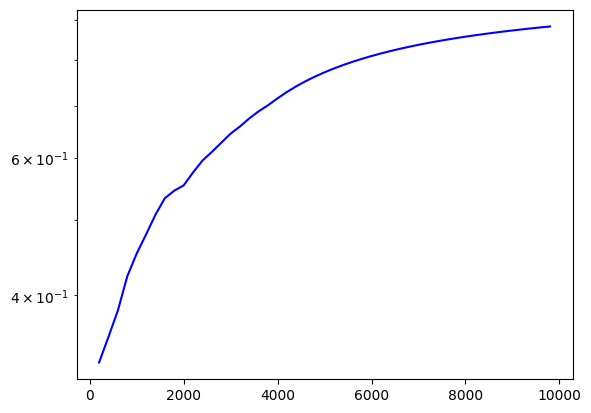

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.0
400: 0.0
600: 0.0
800: 0.0
1000: 0.0
1200: 0.0
1400: 0.0
1600: 0.0
1800: 0.0
2000: 0.0
2200: 0.00045433893684688776
2400: 0.00041649312786339027
2600: 0.00038446751249519417
2800: 0.0003570153516601214
3000: 0.0003332222592469177
3200: 0.0006248047485160887
3400: 0.0005880623346074683
3600: 0.0005554012774229381
3800: 0.0005261773217574323
4000: 0.0004998750312421895
4200: 0.00047607712449416806
4400: 0.0004544421722335833
4600: 0.0004346881112801565
4800: 0.00041657987919183504
5000: 0.0003999200159968006
5200: 0.0003845414343395501
5400: 0.00037030179596371043
5600: 0.0003570790930191037
5800: 0.0003447681434235477
6000: 0.0003332777870354941
6200: 0.0003225286244154169
6400: 0.0003124511795032026
6600: 0.0003029843963035904
6800: 0.00029407440082340834
7000: 0.00028567347521782604
7200: 0.0002777392028884877
7400: 0.00027023375219564923
7600: 0.0002631232732535193
7800:

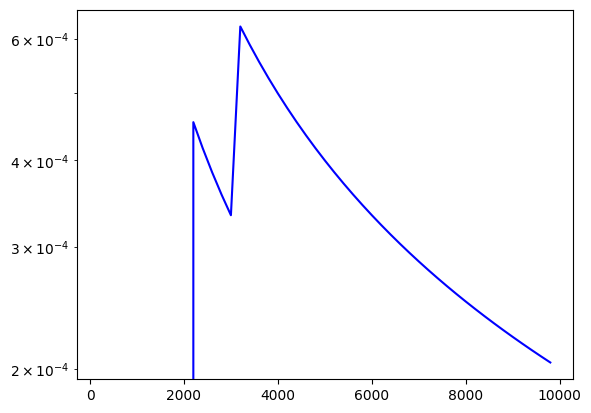

In [16]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(3)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.8258706467661692
400: 0.8478802992518704
600: 0.8602329450915142
800: 0.8813982521847691
1000: 0.8821178821178821
1200: 0.8950874271440467
1400: 0.9057815845824411
1600: 0.9069331667707683
1800: 0.9122709605774569
2000: 0.9120439780109945
2200: 0.9145842798727851
2400: 0.9196168263223656
2600: 0.9234909650134564
2800: 0.9278828989646555
3000: 0.9326891036321227
3200: 0.936582318025617
3400: 0.9397236107027345
3600: 0.9430713690641489
3800: 0.9460668245198632
4000: 0.9485128717820545
4200: 0.9509640561771007
4400: 0.9531924562599409
4600: 0.9552271245381438
4800: 0.957092272443241
5000: 0.9588082383523295
5200: 0.9603922322630264
5400: 0.9618589150157378
5600: 0.9632208534190323
5800: 0.9644888812273746
6000: 0.9656723879353442
6200: 0.966779551685212
6400: 0.9678175285111701
6600: 0.9687926071807302
6800: 0.9697103367151889
7000: 0.9705756320525639
7200: 0.9713928621024858
7400: 0.9721659235238481
7600: 0.9728983028548875
7800:

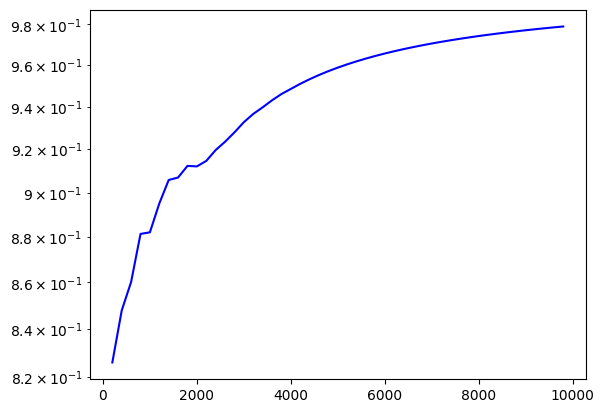

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.8656716417910447
400: 0.8678304239401496
600: 0.8885191347753744
800: 0.8926342072409488
1000: 0.9110889110889111
1200: 0.9217318900915903
1400: 0.9300499643112062
1600: 0.9362898188632105
1800: 0.9400333148250972
2000: 0.9440279860069966
2200: 0.9445706497046797
2400: 0.9479383590170762
2600: 0.9500192233756247
2800: 0.9518029275258836
3000: 0.9543485504831722
3200: 0.9568884723523898
3400: 0.9591296677447809
3600: 0.9605665093029714
3800: 0.9613259668508287
4000: 0.9625093726568358
4200: 0.9623899071649608
4400: 0.9638718473074301
4600: 0.9647902629863073
4800: 0.9656321599666736
5000: 0.9664067186562687
5200: 0.9671217073639685
5400: 0.9677837437511572
5600: 0.9685770398143189
5800: 0.9682813308050336
6000: 0.9685052491251458
6200: 0.9687147234317046
6400: 0.9675050773316669
6600: 0.9659142554158461
6800: 0.9648581091016027
7000: 0.9624339380088559
7200: 0.9609776419941675
7400: 0.9591947034184569
7600: 0.9559268517300356
78

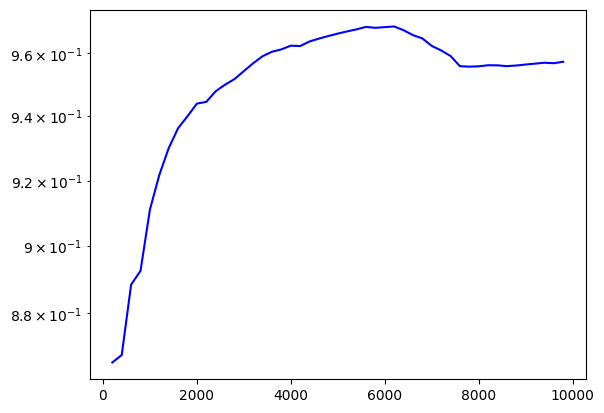

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.9701492537313433
400: 0.9850374064837906
600: 0.9900166389351082
800: 0.9925093632958801
1000: 0.994005994005994
1200: 0.9950041631973355
1400: 0.9957173447537473
1600: 0.9962523422860712
1800: 0.9966685174902832
2000: 0.9970014992503748
2200: 0.9972739663789186
2400: 0.9975010412328197
2600: 0.9976931949250288
2800: 0.9978579078900393
3000: 0.9980006664445185
3200: 0.9981255857544518
3400: 0.9982358129961776
3600: 0.9983337961677312
3800: 0.9984214680347278
4000: 0.9985003749062734
4200: 0.9985717686265175
4400: 0.9986366734832992
4600: 0.9986959356661596
4800: 0.9987502603624245
5000: 0.9988002399520096
5200: 0.9988463756969813
5400: 0.9988890946121088
5600: 0.9989287627209427
5800: 0.9989656955697294
6000: 0.9990001666388936
6200: 0.9990324141267537
6400: 0.9990626464614903
6600: 0.9990910468110892
6800: 0.9991177767975298
7000: 0.9991429795743465
7200: 0.9991667823913345
7400: 0.999189298743413
7600: 0.9992106301802395
7800

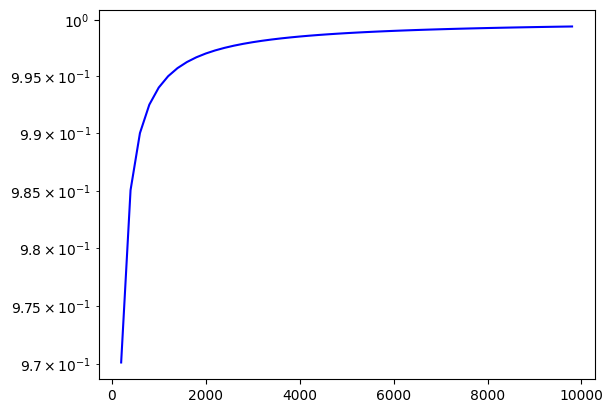

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.9850746268656716
400: 0.9925187032418953
600: 0.9950083194675541
800: 0.9962546816479401
1000: 0.997002997002997
1200: 0.9975020815986678
1400: 0.9978586723768736
1600: 0.9981261711430356
1800: 0.9983342587451416
2000: 0.9985007496251874
2200: 0.9986369831894594
2400: 0.9987505206164098
2600: 0.9988465974625144
2800: 0.9989289539450197
3000: 0.9990003332222592
3200: 0.9990627928772259
3400: 0.9991179064980888
3600: 0.9991668980838656
3800: 0.9992107340173638
4000: 0.9992501874531368
4200: 0.9992858843132587
4400: 0.9993183367416496
4600: 0.9993479678330798
4800: 0.9993751301812123
5000: 0.9994001199760048
5200: 0.9994231878484907
5400: 0.9994445473060545
5600: 0.9994643813604713
5800: 0.9994828477848646
6000: 0.9995000833194467
6200: 0.9995162070633768
6400: 0.9995313232307452
6600: 0.9995455234055446
6800: 0.9995588883987648
7000: 0.9995714897871733
7200: 0.9995833911956673
7400: 0.9995946493717065
7600: 0.9996053150901197
780

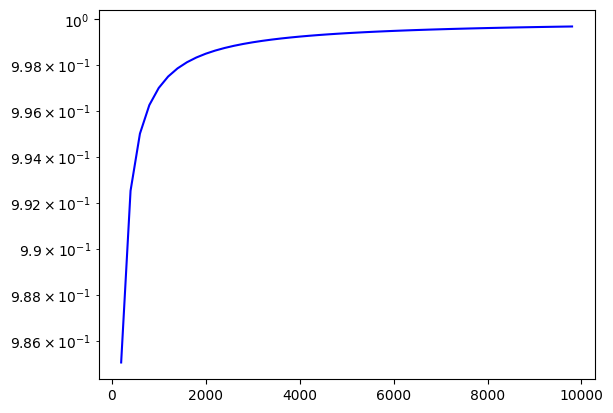

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

200: 0.5024875621890548
400: 0.5012468827930174
600: 0.5008319467554077
800: 0.5006242197253433
1000: 0.5004995004995005
1200: 0.5004163197335554
1400: 0.5003568879371877
1600: 0.5003123048094941
1800: 0.5002776235424764
2000: 0.5002498750624688
2200: 0.5002271694684235
2400: 0.5002082465639317
2600: 0.5001922337562476
2800: 0.50017850767583
3000: 0.5001666111296235
3200: 0.500156201187129
3400: 0.5001470155836518
3600: 0.5001388503193558
3800: 0.5001315443304394
4000: 0.5001249687578105
4200: 0.5001190192811236
4400: 0.5001136105430584
4600: 0.5001086720278201
4800: 0.5001041449697979
5000: 0.5000999800039992
5200: 0.5000961353585849
5400: 0.5000925754489909
5600: 0.5000892697732547
5800: 0.5000861920358559
6000: 0.5000833194467589
6200: 0.5000806321561039
6400: 0.5000781127948758
6600: 0.5000757460990759
6800: 0.5000735186002059
7000: 0.5000714183688044
7200: 0.5000694348007221
7400: 0.500067558438049
7600: 0.5000657808183134
7800: 

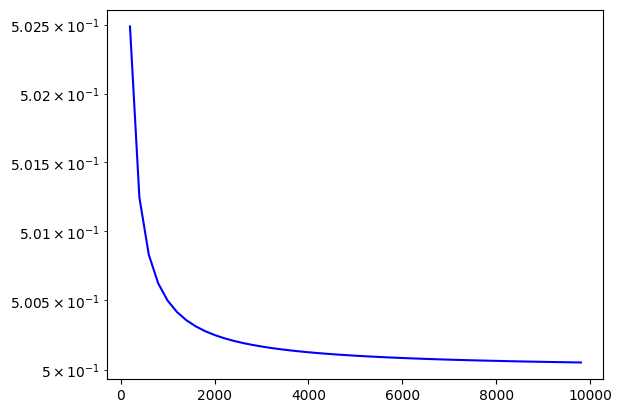

In [26]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)
    reinforced_agent.reset_results()

#### **Reinforce Agent with Nim(5)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.8756218905472637
400: 0.8877805486284289
600: 0.8851913477537438
800: 0.9013732833957553
1000: 0.9010989010989011
1200: 0.9050791007493755
1400: 0.9093504639543183
1600: 0.9119300437226733
1800: 0.9161576901721266
2000: 0.92103948025987
2200: 0.9250340754202635
2400: 0.9258642232403166
2600: 0.9292579777008843
2800: 0.9335951445912174
3000: 0.9373542152615795
3200: 0.9406435488909716
3400: 0.9438400470449868
3600: 0.9469591780061094
3800: 0.9497500657721653
4000: 0.9522619345163709
4200: 0.9545346346108069
4400: 0.9566007725516928
4600: 0.9584872853727451
4800: 0.9602166215371798
5000: 0.9618076384723055
5200: 0.9632762930205729
5400: 0.9646361784854657
5600: 0.9658989466166756
5800: 0.9670746423030512
6000: 0.9681719713381103
6200: 0.9691985163683277
6400: 0.9701609123574442
6600: 0.9710649901530071
6800: 0.9719158947213645
7000: 0.9727181831166977
7200: 0.9734759061241495


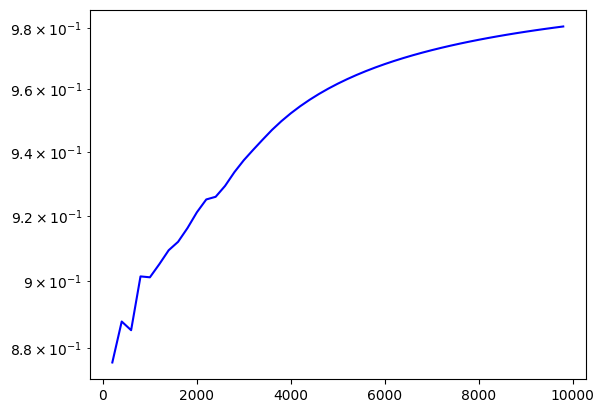

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.8507462686567164
400: 0.8902743142144638
600: 0.8968386023294509
800: 0.9063670411985019
1000: 0.9080919080919081
1200: 0.9134054954204829
1400: 0.9164882226980728
1600: 0.9169269206745784
1800: 0.923375902276513
2000: 0.9230384807596201
2200: 0.9254884143571104
2400: 0.9262807163681799
2600: 0.9284890426758939
2800: 0.9285969296679757
3000: 0.931356214595135
3200: 0.9334582942830365
3400: 0.934725080858571
3600: 0.9358511524576506
3800: 0.9373848987108656
4000: 0.9390152461884529
4200: 0.9400142823137349
4400: 0.9402408543512838
4600: 0.9404477287546186
4800: 0.9410539470943553
5000: 0.9424115176964607
5200: 0.9417419726975582
5400: 0.9422329198296612
5600: 0.9432244242099626
5800: 0.9434580244785382
6000: 0.9436760539910015
6200: 0.944686340912756
6400: 0.9454772691766912
6600: 0.9454628086653537
6800: 0.9457432730480811
7000: 0.9464362233966577
7200: 0.9470906818497431
74

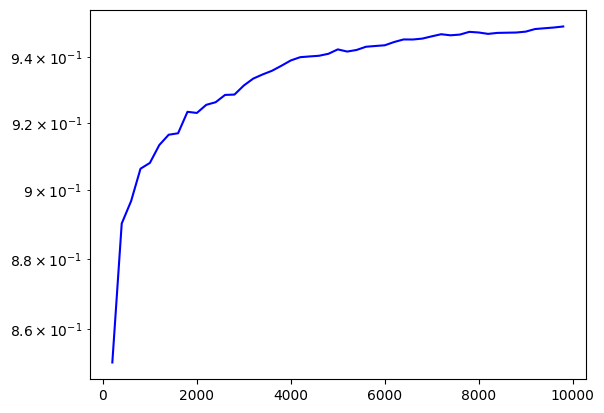

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 1.0
400: 1.0
600: 1.0
800: 1.0
1000: 1.0
1200: 1.0
1400: 1.0
1600: 1.0
1800: 1.0
2000: 1.0
2200: 1.0
2400: 1.0
2600: 1.0
2800: 1.0
3000: 1.0
3200: 1.0
3400: 1.0
3600: 1.0
3800: 1.0
4000: 1.0
4200: 1.0
4400: 1.0
4600: 1.0
4800: 1.0
5000: 1.0
5200: 1.0
5400: 1.0
5600: 1.0
5800: 1.0
6000: 1.0
6200: 1.0
6400: 1.0
6600: 1.0
6800: 1.0
7000: 1.0
7200: 1.0
7400: 1.0
7600: 1.0
7800: 1.0
8000: 1.0
8200: 1.0
8400: 1.0
8600: 1.0
8800: 1.0
9000: 1.0
9200: 1.0
9400: 1.0
9600: 1.0
9800: 1.0


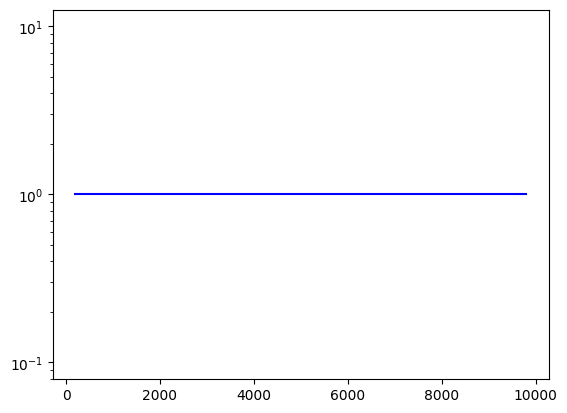

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.8407960199004975
400: 0.9201995012468828
600: 0.9467554076539102
800: 0.9600499375780275
1000: 0.968031968031968
1200: 0.9733555370524563
1400: 0.9771591720199857
1600: 0.9800124921923797
1800: 0.9822320932815103
2000: 0.984007996001999
2200: 0.9854611540208996
2400: 0.9866722199083715
2600: 0.9876970396001538
2800: 0.9885755087468762
3000: 0.9893368877040987
3200: 0.9900031240237426
3400: 0.9905910026462805
3600: 0.991113579561233
3800: 0.9915811628518811
4000: 0.992001999500125
4200: 0.9923827660080933
4400: 0.9927289252442627
4600: 0.9930449902195175
4800: 0.9933347219329306
5000: 0.9936012797440512
5200: 0.9938473370505672
5400: 0.9940751712645807
5600: 0.9942867345116944
5800: 0.9944837097052233
6000: 0.9946675554074321
6200: 0.9948395420093533
6400: 0.9950007811279488
6600: 0.9951522496591425
6800: 0.9952948095868255
7000: 0.9954292243965148
7200: 0.9955561727537842
74

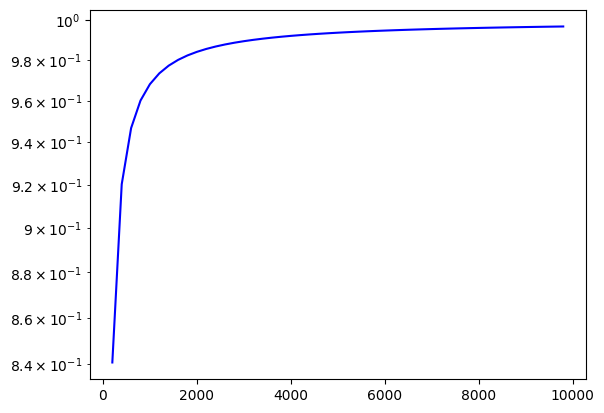

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

200: 0.009950248756218905
400: 0.02493765586034913
600: 0.021630615640599003
800: 0.018726591760299626
1000: 0.01898101898101898
1200: 0.01582014987510408
1400: 0.013561741613133477
1600: 0.011867582760774516
1800: 0.010549694614103275
2000: 0.009495252373813094
2200: 0.008632439800090867
2400: 0.007913369429404415
2600: 0.007304882737408689
2800: 0.006783291681542306
3000: 0.006331222925691436
3200: 0.005935645110902843
3400: 0.00558659217877095
3600: 0.005276312135517912
3800: 0.004998684556695606
4000: 0.0047488127968008
4200: 0.004522732682694597
4400: 0.004317200636219041
4600: 0.0041295370571614864
4800: 0.0039575088523224325
5000: 0.003799240151969606
5200: 0.003653143626225726
5400: 0.003517867061655249
5600: 0.0033922513836814857
5800: 0.003275297362523703
6000: 0.003166138976837194
6200: 0.00306402193194646
6400: 0.002968286205280425
6600: 0.0028783517648841087
6800: 0.00

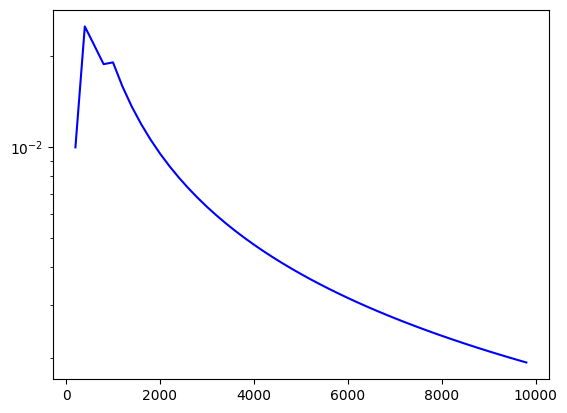

In [27]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)
    reinforced_agent.reset_results()

## ***RL strategy***

In [17]:
def rl_strategy(nim: NimBoard, robot: Agent) -> Nimply:
    state, _ = nim.get_state_and_reward()  # get the current state
    return robot.choose_action(state)

### Evaluation functions modified specifically for a RL Agent

In [18]:
from typing import Callable

# Play Game with RL Agent
def play_nim_rl(num_of_heaps: int, a: Callable, b: Callable, robot: Agent, robo_first=True, k = None, display_board=False) -> None:
    nim = NimBoard(num_of_heaps, k)
    if display_board:
        nim.display_board()
    strategies = (a, b)
    
    players = ['a', 'b']
    turn = 0
    while not game_over(nim, players, turn):
        if robo_first and turn == 0:
            ply = strategies[turn](nim, robot)
        elif not robo_first and turn == 1:
            ply = strategies[turn](nim, robot)
        else:
            ply = strategies[turn](nim)
        nim.nimming(ply)
        if display_board:
            nim.display_board()
        turn = (turn + 1) % 2
    return nim.winner

# Evaluate Ten Games wth RL Agent
NUM_MATCHES = 10
def evaluate_rl(strategy: Callable, other_strategy: Callable, robot: Agent, k=None, nim_size=10) -> float:
    won_1 = 0
    won_2 = 0

    for _ in range(NUM_MATCHES):
        winner_first = play_nim_rl(nim_size, strategy, other_strategy, robot, True, k)
        winner_second = play_nim_rl(nim_size, other_strategy, strategy, robot, False, k)
        if winner_first == 0:
            won_1 += 1
        if winner_second == 1:
            won_2 += 1
    return won_1 / NUM_MATCHES, won_2 / NUM_MATCHES



#### **Note**: the following cells should be executed after the corresponding RL approach has been executed an not in the order they appear

### Evaluate Reinforced agent for Nim(3) w/o incremental learning

In [21]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(3) with incremental learning

In [23]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 0.9)
(1.0, 1.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(5) w/o incremental learning

In [19]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(0.9, 1.0)
(1.0, 1.0)
(0.0, 0.0)


### Evaluate Reinforced agent for Nim(5) with incremental learning

In [28]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(1.0, 0.9)
(1.0, 1.0)
(0.0, 0.0)
